Generation: 0 / 100
Generation: 1 / 100
Generation: 2 / 100
Generation: 3 / 100
Generation: 4 / 100
Generation: 5 / 100
Generation: 6 / 100
Generation: 7 / 100
Generation: 8 / 100
Generation: 9 / 100
Generation: 10 / 100
Generation: 11 / 100
Generation: 12 / 100
Generation: 13 / 100
Generation: 14 / 100
Generation: 15 / 100
Generation: 16 / 100
Generation: 17 / 100
Generation: 18 / 100
Generation: 19 / 100
Generation: 20 / 100
Generation: 21 / 100
Generation: 22 / 100
Generation: 23 / 100
Generation: 24 / 100
Generation: 25 / 100
Generation: 26 / 100
Generation: 27 / 100
Generation: 28 / 100
Generation: 29 / 100
Generation: 30 / 100
Generation: 31 / 100
Generation: 32 / 100
Generation: 33 / 100
Generation: 34 / 100
Generation: 35 / 100
Generation: 36 / 100
Generation: 37 / 100
Generation: 38 / 100
Generation: 39 / 100
Generation: 40 / 100
Generation: 41 / 100
Generation: 42 / 100
Generation: 43 / 100
Generation: 44 / 100
Generation: 45 / 100
Generation: 46 / 100
Generation: 47 / 100
Ge

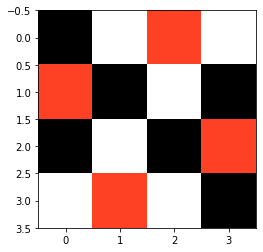

In [3]:
# This algorithm is a Genetic algoritm for the problem of N Queens

import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm


#Functions 
def checkFitness(pop):
    fit = np.zeros((pop[:,1].size,1))
    for index, solution in enumerate(pop):
        for ia,a in enumerate(solution, start = 1):
            for ib, b in enumerate(solution[ia:(len(solution))], start = ia+1):
                # print("Index:",index,"valor de A:",a,"/",ia,"Valor de B:",b,"/",ib) #Control
                if abs(a-b) == abs(ia-ib):
                    fit[index,0] = fit[index,0] + 1
                # if abs(a-b) == 0:
                #     fit[index,0] = fit[index,0] + 1

    return fit

def order_crossover(p1, p2, size):
    
    def fillGene(f,p):
        for ia, a in enumerate(p):
            if a not in f:
                for ib, b in enumerate(f):
                    if b == 0 :
                        f[ib] = a
                        break
        return f

    f1 = np.zeros(len(p1))
    f2 = np.zeros(len(p2))

    c = random.randint(0, (len(p1)-size))

    f1[c:c+size] = p1[c:c+size]
    f2[c:c+size] = p2[c:c+size]
 
    f1 = fillGene(f1,p2)
    f2 = fillGene(f2,p1)

    offsprings = np.vstack([f1,f2])
    return offsprings

def selection(pop, p_sel):
    sel_pool = np.random.permutation(pop[:,1].size)[0:int(round(pop[:,1].size*p_sel))]
    bestSol = pop[sel_pool[0],:]
    for sol in sel_pool[1:len(sel_pool)]:
        if pop[sol,len(bestSol)-1] < bestSol[len(bestSol)-1]:
            bestSol = pop[sol,:]

    return bestSol

def swap_mutation(child,numberOfSwaps):

    for  i in range(numberOfSwaps):
        swapGenesPairs = np.random.choice(len(child), 2, replace = False)
        a = child[swapGenesPairs[0]]
        b = child[swapGenesPairs[1]]

        child[swapGenesPairs[0]] = b
        child[swapGenesPairs[1]] = a 

    return child

def plotCheckBoard(sol):
   
    def checkerboard(shape):
        return np.indices(shape).sum(axis=0) % 2

    sol = sol -1
    size = len(sol)
    color = 0.5
    board = checkerboard((size,size)).astype('float64')
    # board = board.astype('float64')
    for i in range(size):
        board[i, int(sol[i])] = color

    fig, ax = plt.subplots()
    ax.imshow(board, cmap=plt.cm.CMRmap, interpolation='nearest')
    plt.show()

# Parameters of the algorithm

npop = 100        # Number of solutions   
size = 4         # Size of board and queens
ox_size = 2  # variables changed during order crossover 
generation = 100  # Number of generations
p_sel = 0.95  # Probability of Selection
p_m = 0.1  #  Probability of Mutation
numberOfSwaps = 2 # Number of swaps during mutation

# Initializing population and calculating fitness
pop = np.zeros((npop,size))
for i in range(npop):
    pop[i,:] = np.random.permutation(size)+1

fit = checkFitness(pop)
pop = np.hstack((pop, fit))

meanFit = np.zeros(generation)

# Main
for gen in range(generation):

    print(f"Generation: {gen} / {generation}")

    parents = [selection(pop,p_sel),selection(pop,p_sel)]
    
    offsprings = order_crossover(parents[0][0:size], parents[1][0:size], ox_size)

    for child in range(len(offsprings)):
        r_m = round(random.random(),2)
        if r_m <= p_m:
            offsprings[child] = swap_mutation(offsprings[child], numberOfSwaps) 

    fitOff = checkFitness(offsprings)
    offsprings = np.hstack((offsprings, fitOff))

    pop = np.vstack([pop,offsprings])

    pop = pop[pop[:,size].argsort()][0:npop, :]

    meanFit[gen] = (pop[:,size]).mean()


#Best solution
bestSol = pop[np.argmin(pop[:, size]), :]



print(f"Best Solution have: { bestSol[size]} Conflict(s)")
plotCheckBoard(bestSol[0:size])